In [1]:
from src import *

In [2]:
# file_name = 'transfered_siamese_model_Isaac'
file_name = 'naive_siamese_model_Isaac'

siamese_model = make_siamese_model(make_embedding())
siamese_model.load_weights(os.path.join(SAVED_MODEL_PATH, f"{file_name}.h5"))

In [3]:
results = verify(siamese_model)
print(results)

Verifying 25 data.
[[0.5056067 ]
 [0.38492277]
 [0.5096769 ]
 [0.00181946]
 [0.5204474 ]
 [0.4362222 ]
 [0.5244805 ]
 [0.42653632]
 [0.47152594]
 [0.4952423 ]
 [0.7429948 ]
 [0.5005868 ]
 [0.48225442]
 [0.5197117 ]
 [0.5574679 ]
 [0.51461273]]


In [4]:
k,m =-1,-1

18 41


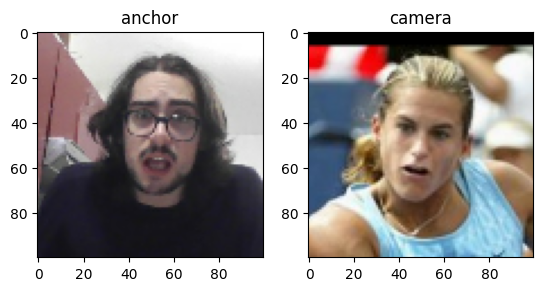

[[0.00104538]]


In [224]:
# k = np.random.randint(0, len(os.listdir(ANC_PATH)))
# m = np.random.randint(0, len(os.listdir(VER_PATH)))
k+=1; m+=1
k %= len(os.listdir(ANC_PATH)); m %= len(os.listdir(VER_PATH))
print(k,m)
anchor_file_path = os.path.join(ANC_PATH, os.listdir(ANC_PATH)[k])
verify_file_path = os.path.join(VER_PATH, os.listdir(VER_PATH)[m])

test_input = np.array(preprocess(anchor_file_path))
test_val = np.array(preprocess(verify_file_path))
plot_images_b2b(test_input, test_val, title1='anchor', title2='camera')

result = siamese_model.predict([np.array([test_input]), np.array([test_val])])
print(result)

In [6]:
# cap = cv2.VideoCapture(0)
# while cap.isOpened():
#     ret, frame = cap.read()
#     frame = frame[120:120+250,200:200+250, :]
    
#     cv2.imshow('Verification', frame)
    
#     # Verification trigger
#     if cv2.waitKey(10) & 0xFF == ord('v'):
#         # Save input image to application_data/input_image folder 
#         cv2.imwrite(os.path.join(VER_PATH, 'input_image.jpg'), frame)
#         # Run verification

#         k = np.random.randint(0, len(os.listdir(ANC_PATH)))
#         print(k)
#         anchor_file_path = os.path.join(ANC_PATH, os.listdir(ANC_PATH)[k])
#         verify_file_path = os.path.join(VER_PATH, 'input_image.jpg')

#         test_input = np.array(preprocess(anchor_file_path))
#         test_val = np.array(preprocess(verify_file_path))
#         plot_images_b2b(test_input, test_val)
#         result = siamese_model.predict([np.array([test_input]), np.array([test_val])])
#         print(result)
    
#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()